In [1]:
from pathlib import Path
from typing import Tuple

import numpy as np
import numpy.typing as npt
import skimage.transform
import skimage.util
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from tifffile import tifffile

from pybasic.basic import basic

working_size = 128
images_path = Path(r'images/Cell_culture/Uncorrected/DAPI')

In [2]:
def resize(a: npt.NDArray, shape: Tuple[int, ...]) -> npt.NDArray:
    return skimage.transform.resize(a, shape, order=1, mode='symmetric')


# read in images
images = [tifffile.imread(p) for p in images_path.iterdir()]
images = [resize(im, (working_size, working_size)) for im in images]
images = np.stack(images)
images = skimage.util.img_as_float(images)

# With darkfield

In [3]:
flatfield, darkfield = basic(images, compute_darkfield=True)

/home/titanium/PycharmProjects/pybasic/src/pybasic/basic.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  dark_mean = min(dark_mean, ims_min / flat_mean)


/tmp/ipykernel_1039333/2042775181.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


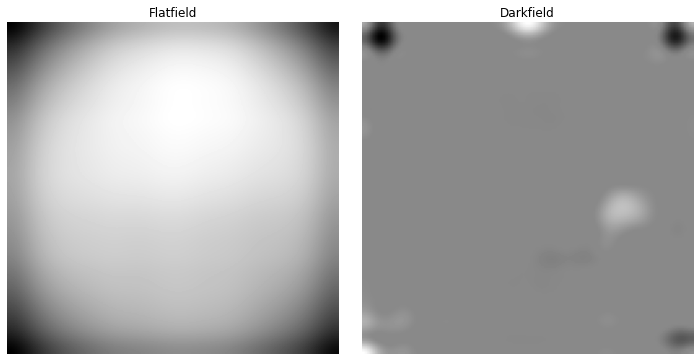

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

axes[0].imshow(flatfield, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Flatfield')

axes[1].imshow(darkfield, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Darkfield')

fig.tight_layout()
fig.show()

/tmp/ipykernel_1039333/3097668639.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


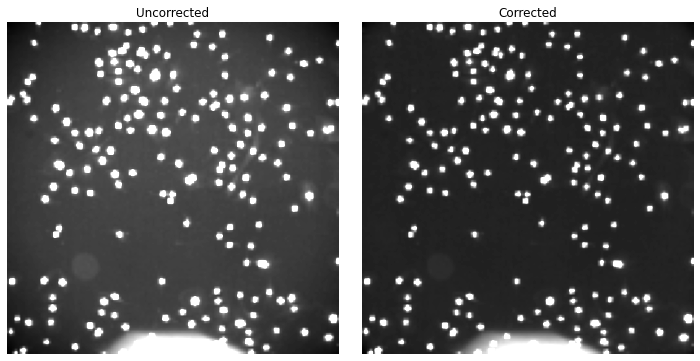

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

image = images[0]
corrected = (image - darkfield) / flatfield

# blow out slightly so that the uneven illumination is visible
axes[0].imshow(image, vmax=0.005, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Uncorrected')

axes[1].imshow(corrected, vmax=0.005, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Corrected')

fig.tight_layout()
fig.show()

# Without darkfield

In [6]:
flatfield, _ = basic(images, compute_darkfield=False)

/tmp/ipykernel_1039333/3127699402.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


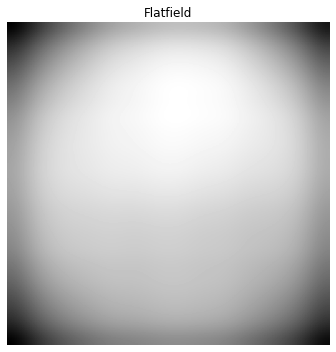

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fig: Figure
ax: Axes

ax.imshow(flatfield, cmap='gray')
ax.axis('off')
ax.set_title('Flatfield')

fig.tight_layout()
fig.show()

/tmp/ipykernel_1039333/2179797340.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


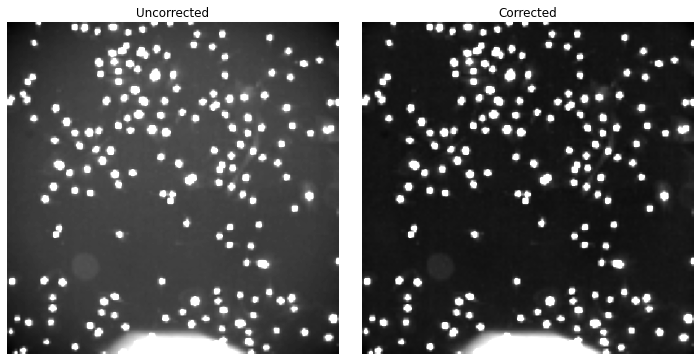

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

image = images[0]
corrected = image / flatfield

# increase contrast so that the uneven illumination is visible
axes[0].imshow(image, cmap='gray', vmax=0.005)
axes[0].axis('off')
axes[0].set_title('Uncorrected')

axes[1].imshow(corrected, cmap='gray', vmax=0.005)
axes[1].axis('off')
axes[1].set_title('Corrected')

fig.tight_layout()
fig.show()